# 7. Deep Learning

## 7-1. Artificial Neural Network(인공 신경망)

In [4]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [5]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


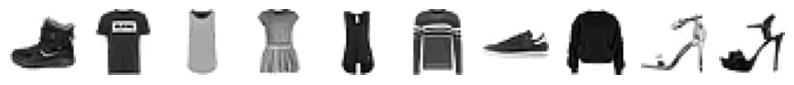

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [7]:
# 이미지 데이터의 경우 픽셀 값을 0~255 -> 0~1로 정규화
train_scaled = train_input / 255.0
# SGDClassifier가 2차원 배열을 다루지 못하기에 1차원 배열로 줄여야됨
train_scaled = train_scaled.reshape(-1, 28 * 28)

In [8]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8196000000000001


### 인공 신경망

- 출력층: 신경망의 최종값을 만드는 layer
- 입력층: 입력 값(여기선 픽셀 x_1 ~ x_784)
- 뉴런(neuron, unit): 인공 신경망에서 출력값을 계산하는 단위

딥러닝은 인공 신경망과 거의 동의어로 사용, 심층 신경망(Deep Nerual Network)을 딥러닝으로 부른 경우가 많음.

### Tensorflow and Keras

- TensorFlow: 구글이 2015/11에 오픈소스로 공개한 딥러닝 라이브러리
- Keras: Tensorflow's 고수준 API
  - 사실 Keras는 여러 백엔드 API 위에서 동작할 수 있음(Theano, CNTK 등)
  - 2.3.1 이후 다른 백엔드에서는 개발하지 않음
  - 그냥 Tensorflow == Keras

### 인공신경망에서의 검증

- 인공신경망에서는 교차 검증을 잘 사용하지 않고, 검증 세트를 별도로 덜어내어 사용
  - 딥러닝 분야 데이터 셋이 충분히 커서 검증 점수 안정적
  - 교차 검증은 시간이 오래걸림

### 밀집층, 완전 연결층

- 입력층과 출력층을 잇는 784개의 입력층 * 10개의 뉴런 연결 선이 있는 층
  - 이런 경우 양쪽의 뉴런들이 모두 연결되어 있기 때문에 **완전 연결층**이라 부름

In [9]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [10]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [11]:
from tensorflow import keras

# Dense(뉴런 개수, activation='뉴런 출력에 적용하는 함수', input_shape=입력의 크기)
# Densesms 밀집층을 만든다
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [12]:
model = keras.Sequential(dense)

In [16]:
# 훈련하기

# 설정 단계
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# 손실함수
# 이진 분류는 binary_crossentropy
# 다중 분류는 categorical_crossentroypy
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [17]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 9s 3ms/step - loss: 0.6037 - accuracy: 0.7952
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4746 - accuracy: 0.8399
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4494 - accuracy: 0.8494
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4372 - accuracy: 0.8544
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4289 - accuracy: 0.8557


In [18]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.4377 - accuracy: 0.8521


[0.4377163052558899, 0.8520833253860474]

## 7-2. Deep Neural Network(DNN)

In [19]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()

In [20]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28 * 28)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

### 은닉층

#### 인공 신경망 층을 2개로 만들자
입력층과 출력층 사이에 있는 것들은 **은닉층(hidden layer)**라고 부른다

#### 모든 은닉층의 출력층에는 활성화 함수가 존재함
- 출력층에 적용되는 활성화 함수는 시그모이드, 소프트 맥스
- 은닉층에서는 시그모이드와 렐루 사용
  - 왜 은닉층에서는 활성화 함수를 적용할까?

은닉층에서 선형적인 산술 계산만 수행하면 수행 역할이 사라짐

선형 계산을 적당하게 비선형적으로 비틀어줘야 은닉층의 역할을 줄 수 있음

In [22]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

# 은닉층의 뉴런 갯수는 따로 정해진 규칙이 없음
# 상당한 경험이 있어야 됨
# 적어도 출력 층의 뉴런보다는 많아야됨

model = keras.Sequential([dense1, dense2])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5694 - accuracy: 0.8067
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4120 - accuracy: 0.8521
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3772 - accuracy: 0.8633
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3532 - accuracy: 0.8725
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3349 - accuracy: 0.8782


### Relu

이미지 처리에서 좋은 성능

```kotlin
fun relu(input: Int) {
  return if (input <= 0) 0 else input
}
```

In [25]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [28]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5368 - accuracy: 0.8110
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3957 - accuracy: 0.8576
Epoch 3/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3563 - accuracy: 0.8706
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3322 - accuracy: 0.8804
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3199 - accuracy: 0.8848


In [29]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.4053 - accuracy: 0.8600


[0.4053148329257965, 0.8600000143051147]

### Optimizer

은닉층의 뉴런 갯수, 층의 종류 모두 하이퍼 파라미터!

- 케라스에서는 미니배치 경사하강법 사용, 미니배치 갯수 32개
  - fit의 batch_size에서 리를 조정 가능
- compile 메서드에서는 기본 경사 하강법 알고리즘은 RMSprop을 활용
  - 케라스에서는 다양한 종류의 경사하강법 알고리즘(Optimizer)를 제공

가장 기본적인 옵티마이저는 SGD(Stochastic Gradient Descent, 확률적 경사하강법)

In [30]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [31]:
# model의 optimizer를 'adam'으로 바꾸자
# Adam = RMSprop + Momentum(이전 그레디언트를 가속도로 활용하는 옵티마이저)

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [32]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5245 - accuracy: 0.8166
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3954 - accuracy: 0.8583
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3552 - accuracy: 0.8708
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3271 - accuracy: 0.8809
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3062 - accuracy: 0.8875


In [33]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3600 - accuracy: 0.8701


[0.35997700691223145, 0.8700833320617676]

## 7-3. 신경망 모델 훈련

- fit()의 return 값 활용해서 훈련세트, 검증세트 손실 그래프로 그릴 수 있음
- 드롭아웃
  - Overfitting 규제하기 위한 방식
  - 일부 뉴런의 출력을 랜덤하게 껴서 많은 신경망을 앙상블하듯 하는 효과
- 모델 저장 및 복원 그리고 콜백

In [34]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [35]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [36]:
model = model_fn()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# verbose
# 1(default): 에포크마다 진행 막대와 손실 지표 출력
# 2: 진행 막대빼고 출력
# 0: 훈련과정 안 보여주기
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [38]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


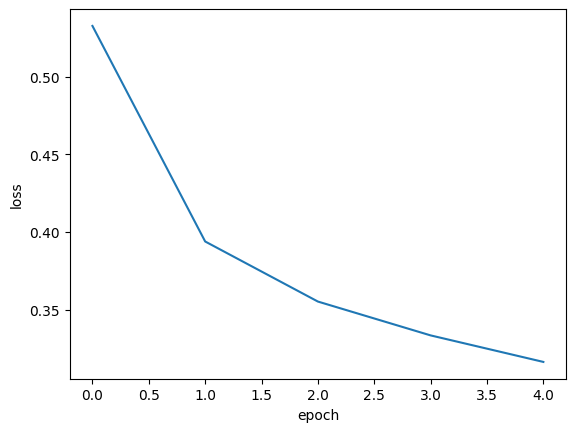

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

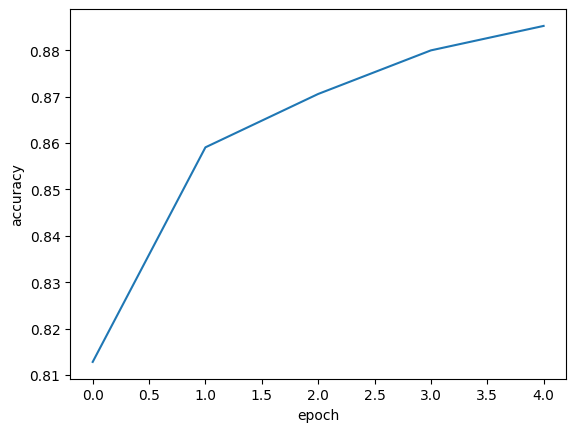

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

### 검증 손실

에포크마다 과대적합, 과소적합이 일어나는지 파악하려면 어떻게 해야할까?

- 훈련세트의 손실만 그리지 말고 검증 세트의 검수도 필요함

In [41]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [42]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


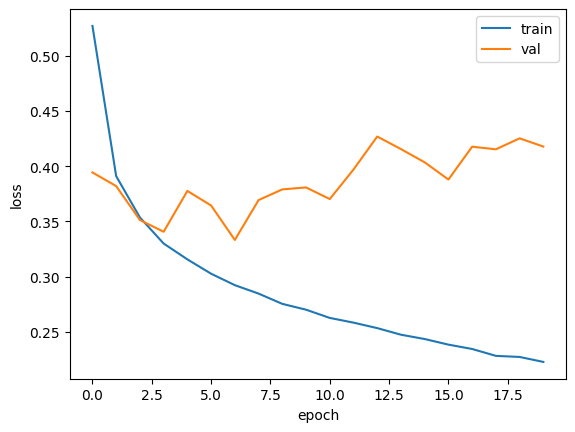

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5204 - accuracy: 0.8174 - val_loss: 0.4509 - val_accuracy: 0.8398
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3934 - accuracy: 0.8588 - val_loss: 0.3710 - val_accuracy: 0.8656
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3534 - accuracy: 0.8703 - val_loss: 0.3508 - val_accuracy: 0.8708
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3255 - accuracy: 0.8800 - val_loss: 0.3510 - val_accuracy: 0.8679
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3079 - accuracy: 0.8877 - val_loss: 0.3336 - val_accuracy: 0.8795
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2928 - accuracy: 0.8913 - val_loss: 0.3405 - val_accuracy: 0.8768
Epoch 7/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2801 - accuracy: 0.8961 - val_loss: 0.3189 - val_accuracy:

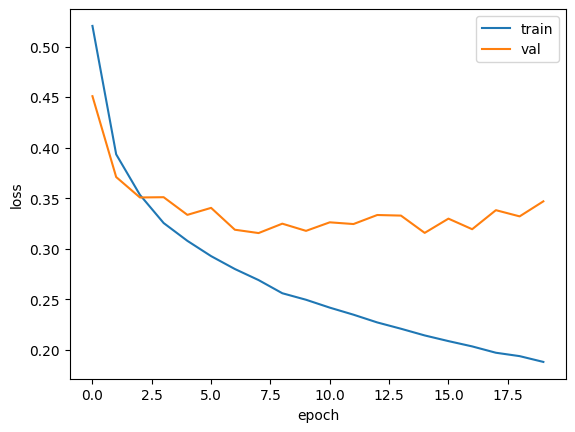

In [44]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 드롭아웃

훈련과정 중에 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막기 위함

In [45]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_16 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5232 - accuracy: 0.8159 - val_loss: 0.4159 - val_accuracy: 0.8544
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3906 - accuracy: 0.8604 - val_loss: 0.3756 - val_accuracy: 0.8630
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3506 - accuracy: 0.8737 - val_loss: 0.3535 - val_accuracy: 0.8723
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3272 - accuracy: 0.8803 - val_loss: 0.3706 - val_accuracy: 0.8675
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3090 - accuracy: 0.8863 - val_loss: 0.3496 - val_accuracy: 0.8713
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2918 - accuracy: 0.8924 - val_loss: 0.3436 - val_accuracy: 0.8763
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2790 - accuracy: 0.8961 - val_loss: 0.3377 - val_accuracy:

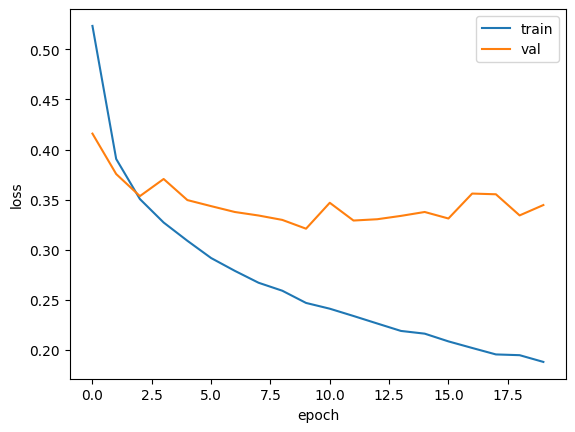

In [46]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### Callback

훈련 과정 중간에 어떤 작업을 수행할 수있게 하는 객체

#### ModelCheckpoint

최상의 검증 점수를 만드는 모델 저장

In [48]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5198 - accuracy: 0.8188 - val_loss: 0.4175 - val_accuracy: 0.8511
Epoch 2/20
  63/1500 [>.............................] - ETA: 3s - loss: 0.4078 - accuracy: 0.8576

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 6s 4ms/step - loss: 0.3917 - accuracy: 0.8613 - val_loss: 0.3783 - val_accuracy: 0.8611
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3518 - accuracy: 0.8731 - val_loss: 0.3523 - val_accuracy: 0.8730
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3271 - accuracy: 0.8791 - val_loss: 0.3456 - val_accuracy: 0.8749
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3073 - accuracy: 0.8859 - val_loss: 0.3370 - val_accuracy: 0.8770
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2896 - accuracy: 0.8923 - val_loss: 0.3219 - val_accuracy: 0.8804
Epoch 7/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2790 - accuracy: 0.8978 - val_loss: 0.3253 - val_accuracy: 0.8841
Epoch 8/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2671 - accuracy: 0.9007 - val_loss: 0.3545 - val_accuracy: 0.8751
Epo

In [49]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.3299 - accuracy: 0.8906


[0.3299371898174286, 0.890583336353302]

### 조기종료(EarlyStopping)

- 조기종료를 위한 콜백: EarlyStopping
  - 하이퍼파라미터 patience를 n만큼 정하면 n번의 에포크 이내에 검증점수가 향상되지 않을 시에 바로 훈련 중지
  - best_weights 패러미터 True로 두면 가장 낮은 검증 손실을 낸 모델 패러미터로 되돌리기

In [52]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5865 - accuracy: 0.7920 - val_loss: 0.4261 - val_accuracy: 0.8472
Epoch 2/20
  29/1500 [..............................] - ETA: 5s - loss: 0.4266 - accuracy: 0.8416

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 8s 5ms/step - loss: 0.4340 - accuracy: 0.8431 - val_loss: 0.3738 - val_accuracy: 0.8631
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4010 - accuracy: 0.8559 - val_loss: 0.3675 - val_accuracy: 0.8695
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3798 - accuracy: 0.8622 - val_loss: 0.3524 - val_accuracy: 0.8704
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3664 - accuracy: 0.8656 - val_loss: 0.3408 - val_accuracy: 0.8749
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3528 - accuracy: 0.8700 - val_loss: 0.3414 - val_accuracy: 0.8759
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3435 - accuracy: 0.8731 - val_loss: 0.3361 - val_accuracy: 0.8739
Epoch 8/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3322 - accuracy: 0.8778 - val_loss: 0.3396 - val_accuracy: 0.8774
Epo

In [53]:
print(early_stopping_cb.stopped_epoch)

12


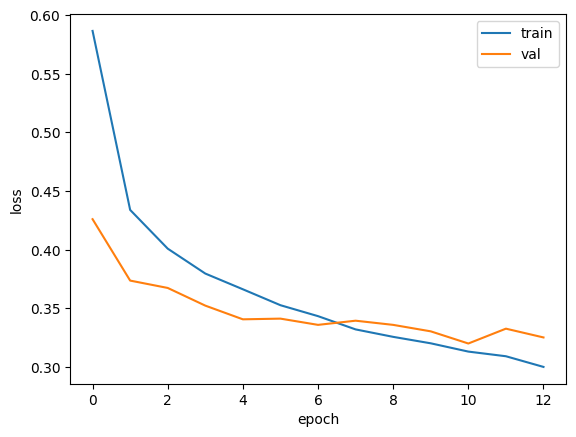

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()